<a href="https://colab.research.google.com/github/Sigma-/graph-mining-grX/blob/main/TIJ%20-%20SFHH%20-%20Graph%20Mining%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/tij_InVS.dat', header = 1)
data.columns = ['tij']
data

,tij
0,29300 181 826
1,29780 79 181
2,30000 150 196
3,30020 21 150
4,30060 21 205
...,...
9820,1015380 150 601
9821,1015400 150 601
9822,1015440 150 601
9823,1016420 150 601


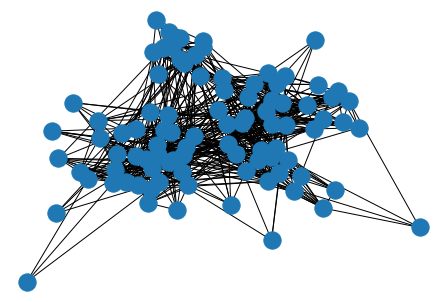

In [4]:
def load_sociopatterns_network():
    df = pd.DataFrame(data.tij.str.split(' ',3).tolist(),columns=['t','i','j'])
    #df['weigth'] = '1'
    G = nx.Graph()
    for row in df.iterrows():
        p1 = row[1]["i"]
        p2 = row[1]["j"]
        if G.has_edge(p1, p2):
            G.edges[p1, p2]["weight"] += 1
        else:
            G.add_edge(p1, p2, weight=1)

    for n in sorted(G.nodes()):
        G.nodes[n]["order"] = float(n)

    return G

G = load_sociopatterns_network()
nx.draw(G)

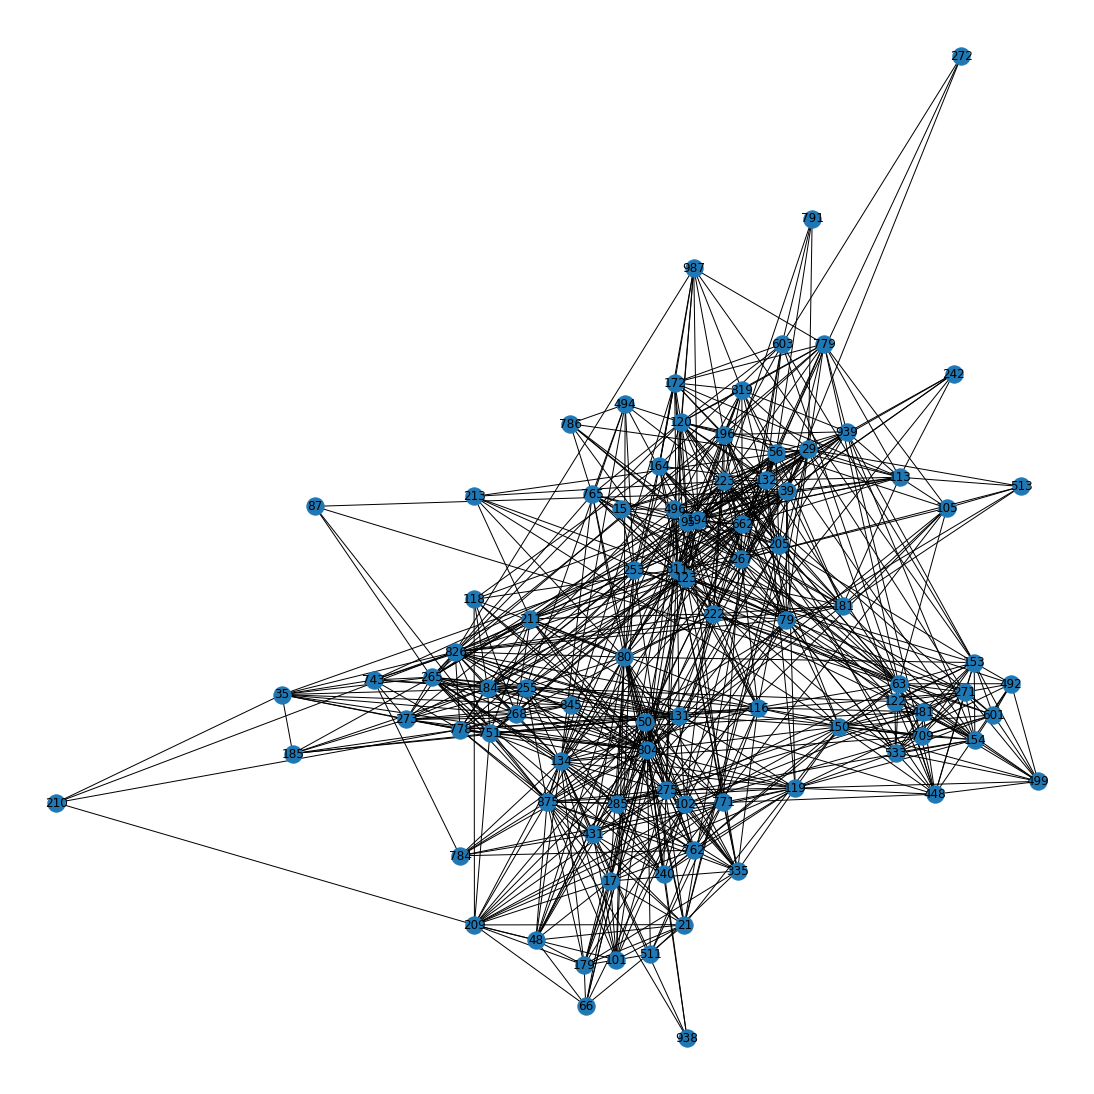

In [6]:
def drawGraph (G, pos = None):
    plt.figure (figsize=(15,15))
    if not pos:
        pos = nx.spring_layout(G)
    nx.draw(G, pos)
    nx.draw_networkx_labels(G, pos) 
    plt.show()
    
drawGraph(G)

In [ ]:
#nbr nodes & edges 
len(G.nodes()), len(G.edges())

(403, 9564)

In [ ]:
#degré de centralité
dcs = pd.Series(nx.degree_centrality(G))
dcsasc = dcs.sort_values(ascending=False)
dcsasc

1599    0.420398
1688    0.417910
1655    0.405473
1441    0.393035
1825    0.388060
          ...   
1793    0.007463
1594    0.007463
1646    0.007463
1618    0.004975
1780    0.002488
Length: 403, dtype: float64

In [ ]:
#centralité 2
dbs = pd.Series(nx.betweenness_centrality(G))
dbs

1591    0.004543
1467    0.002833
1568    0.005417
1562    0.008325
1524    0.001600
          ...   
1876    0.002110
1913    0.000915
1883    0.000917
1870    0.000499
1446    0.000220
Length: 403, dtype: float64

In [ ]:
#noeud avec le plus de liens
def rank_ordered_neighbors(G):

    s = pd.Series({n: len(list(G.neighbors(n))) for n in G.nodes()})
    return s.sort_values(ascending=False)

rank_ordered_neighbors(G)


1599    169
1688    168
1655    163
1441    158
1825    156
       ... 
1793      3
1594      3
1646      3
1618      2
1780      1
Length: 403, dtype: int64

Degree sequence [169, 168, 163, 158, 156, 127, 124, 122, 122, 121, 119, 118, 116, 109, 108, 108, 107, 106, 105, 104, 104, 103, 101, 101, 101, 100, 99, 97, 97, 97, 96, 95, 94, 93, 91, 91, 91, 89, 88, 88, 87, 87, 85, 85, 85, 84, 83, 83, 82, 81, 81, 81, 81, 81, 80, 79, 78, 78, 78, 77, 77, 77, 77, 76, 76, 76, 76, 75, 75, 74, 74, 74, 74, 74, 74, 73, 73, 72, 72, 72, 72, 71, 70, 70, 70, 70, 70, 69, 69, 68, 68, 68, 67, 67, 67, 67, 66, 66, 65, 64, 63, 63, 63, 63, 63, 63, 62, 62, 62, 61, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 60, 59, 59, 59, 59, 58, 58, 57, 57, 57, 57, 57, 57, 56, 56, 56, 55, 55, 55, 55, 54, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 52, 52, 51, 50, 50, 50, 50, 49, 49, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 46, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 3

NameError: name 'collections' is not defined

# 2-degree_distribution

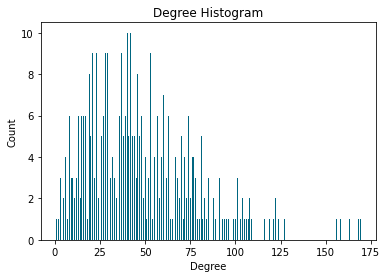

In [ ]:
import collections
# extract the degree sequence
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
#print("Degree sequence", degree_sequence)

# compute the number of nodes having a given centrality
degreeCount = collections.Counter(degree_sequence)
#print("degreeCount", degreeCount)

# spilt into two differents list the degree and the number of nodes having that degree
deg, cnt = zip(*degreeCount.items())
#print(deg, cnt)

# build and draw histogram
plt.bar(deg, cnt, width=0.5, color=(0, 0.4, 0.5, 1))

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

# 3-clustering_coefficient

In [ ]:
# compute and display the average clustering coefficient of the karate club graph
print(nx.average_clustering(G))

0.28172259003002936


# 4-configuration_model


In [ ]:
import community
plt.figure(figsize=((10,8))
           
partition = community.best_partition(G[0])
size = float(len(set(partition.values())))
pos = nx.kamada_kawai_layout(G[0])
count = 0
colors = ['red', 'blue', 'yellow', 'black',
          'brown', 'purple', 'green', 'pink']
for com in set(partition.values()):
    list_nodes = [nodes for
                  nodes in partition.keys()
                if partition[nodes] == com]
    nx.draw_networkx_nodes(G[0],
        pos, list_nodes, node_size = 20,
        node_color = colors[count])
    count = count + 1

nx.draw_networkx_edges(G[0], pos, alpha=0.2)

plt.plot(run_before, run_after, 'ro-')
plt.plot(walk_before, walk_after, 'bo-')
plt.show()

SyntaxError: invalid syntax (<ipython-input-83-67fb70160546>, line 4)